<h1 style="color:navy; text-align:center;">Uncovering Cancer Trends in England: A Decade of NHS Insights</h1>


## 📖 Introduction

Cancer remains one of the most significant health challenges in England, affecting thousands of individuals each year. The NHS collects comprehensive data on cancer diagnoses, which provides valuable insights into patterns and trends across the population. This project analyzes NHS cancer statistics from 2013 to 2022, with a focus on factors such as cancer type, stage at diagnosis, gender, and the distribution of cases among different population groups. By examining these patterns, the project aims to understand how cancer incidence varies across the population and how it has evolved over the past decade. While the primary goal is to gain a deeper understanding of cancer trends, the insights generated could also help inform NHS strategies related to early detection, prevention, and improving patient outcomes. Through this analysis, the project seeks to uncover important trends, highlight areas of concern, and provide a data-driven perspective on how cancer impacts various segments of the population.

## 🎯 Aim 

To analyze NHS cancer statistics from 2013 to 2022 in order to understand the distribution and trends of cancer incidence across different population groups, considering factors such as cancer type, stage at diagnosis, and gender, and to generate insights that could support a better understanding of how cancer affects the population.

## 🏥 Objective

1. To explore and describe trends in cancer incidence over the past decade.

2. To examine the distribution of different cancer types among various population groups.

3. To analyze differences in cancer incidence between genders.

4. To identify population groups that may be disproportionately affected by cancer.

5. To provide visualizations and data-driven insights that help understand the overall cancer landscape in England.

## 💡Data Snapshot: Overview of the Data

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Project\NHS_CancerData.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18032\3578574885.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Project\NHS_CancerData.csv")


In [5]:
df.head()

,diagnosisyear,geography_type,geography_code,geography_name,ndrs_main_group,ndrs_detailed_group,stage_at_diagnosis,imd_quintile,hormone_receptor,hormone_receptor_status,gender,age_at_diagnosis,count,Population,type_of_rate,rate,lower_confidence_interval,upper_confidence_interval,flag
0,2013,Country,E92000001,England,Anus,All Anus,All stages,All quintiles,NaN,NaN,Persons,All ages,1057,53918686,Age-standardised,2.1,2.0,2.3,NaN
1,2013,Country,E92000001,England,Anus,All Anus,All stages,All quintiles,NaN,NaN,Females,All ages,668,27410034,Age-standardised,2.6,2.4,2.8,NaN
2,2013,Country,E92000001,England,Anus,All Anus,All stages,All quintiles,NaN,NaN,Males,All ages,389,26508652,Age-standardised,1.7,1.5,1.9,NaN
3,2013,Country,E92000001,England,Anus,All Anus,All stages,1 - most deprived,NaN,NaN,Persons,All ages,232,10887630,Age-standardised,2.8,2.5,3.2,NaN
4,2013,Country,E92000001,England,Anus,All Anus,All stages,2,NaN,NaN,Persons,All ages,219,10952016,Age-standardised,2.5,2.2,2.8,NaN


*✅ The first few rows show cancer diagnosis records, including details on year, geography, cancer type, stage, demographics, and statistical indicators such as counts and rates.*

In [6]:
df.shape

(35030, 19)

✅ *The dataset comprises 35,030 rows and 19 columns.*

In [7]:
df.columns

Index(['diagnosisyear', 'geography_type', 'geography_code', 'geography_name',
       'ndrs_main_group', 'ndrs_detailed_group', 'stage_at_diagnosis',
       'imd_quintile', 'hormone_receptor', 'hormone_receptor_status', 'gender',
       'age_at_diagnosis', 'count', 'Population', 'type_of_rate', 'rate',
       'lower_confidence_interval', 'upper_confidence_interval', 'flag'],
      dtype='object')

✅ *The dataset includes variables capturing diagnosis year, geography, cancer type, stage, demographics, incidence counts, population, and rate estimates.*

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35030 entries, 0 to 35029
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   diagnosisyear              35030 non-null  int64  
 1   geography_type             35030 non-null  object 
 2   geography_code             35030 non-null  object 
 3   geography_name             35030 non-null  object 
 4   ndrs_main_group            35030 non-null  object 
 5   ndrs_detailed_group        35030 non-null  object 
 6   stage_at_diagnosis         35030 non-null  object 
 7   imd_quintile               35030 non-null  object 
 8   hormone_receptor           690 non-null    object 
 9   hormone_receptor_status    690 non-null    object 
 10  gender                     35030 non-null  object 
 11  age_at_diagnosis           35030 non-null  object 
 12  count                      35030 non-null  int64  
 13  Population                 35030 non-null  int

✅ *The dataset contains 35,030 rows and 19 columns. Out of these, 13 are categorical, 3 are integers (diagnosisyear, count, Population), and 3 are decimals (rate, lower_confidence_interval, upper_confidence_interval).*

*Some fields are quite sparse:*

*1)The hormone receptor fields are missing for almost the entire dataset (around 98% missing).*

*2)The flag column is missing in nearly 80% of rows.*

*The age_at_diagnosis column is stored as text, suggesting it may represent age bands rather than exact ages.*


In [9]:
df.describe()

,diagnosisyear,count,Population,rate,lower_confidence_interval,upper_confidence_interval
count,35030.000000,35030.000000,3.503000e+04,29792.000000,29792.000000,29792.000000
mean,2017.500000,1497.867713,2.124806e+07,12.719364,12.260382,13.210795
std,2.872322,6697.796599,1.757073e+07,43.901143,43.332517,44.474403
min,2013.000000,0.000000,5.201813e+06,0.000000,0.000000,0.000000
25%,2015.000000,32.000000,5.650682e+06,0.500000,0.400000,0.700000
50%,2017.500000,166.000000,1.137309e+07,1.900000,1.700000,2.200000
75%,2020.000000,740.000000,2.830780e+07,7.700000,7.100000,8.300000
max,2022.000000,230968.000000,5.711254e+07,673.600000,666.700000,680.500000


✅*The dataset covers cancer diagnoses from 2013 to 2022.*

*Case counts range from 0 to 230,968, with most records showing relatively small numbers.*

*Population figures span from about 5 million to 57 million, with a middle value around 11 million.*

*The rate column shows how common cancer is in the population (cases per 100,000). Most rates are low, with a median of about 1.9, but a few records have much higher rates, reaching up to 673.6.*

*The confidence interval columns show the likely range for the rate. Most values fall between 0.4 and 8.3, though a few extreme records have much higher ranges, above 600.*

## 🧹Data Pre-processing and Cleaning

### change ndrs????

### check for different cases - upper / lower discrepancies 

=====================================

In [10]:
df.isnull()

,diagnosisyear,geography_type,geography_code,geography_name,ndrs_main_group,ndrs_detailed_group,stage_at_diagnosis,imd_quintile,hormone_receptor,hormone_receptor_status,gender,age_at_diagnosis,count,Population,type_of_rate,rate,lower_confidence_interval,upper_confidence_interval,flag
0,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35025,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
35026,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
35027,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
35028,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True


In [11]:
df.isnull().sum()

diagnosisyear                    0
geography_type                   0
geography_code                   0
geography_name                   0
ndrs_main_group                  0
ndrs_detailed_group              0
stage_at_diagnosis               0
imd_quintile                     0
hormone_receptor             34340
hormone_receptor_status      34340
gender                           0
age_at_diagnosis                 0
count                            0
Population                       0
type_of_rate                     0
rate                          5238
lower_confidence_interval     5238
upper_confidence_interval     5238
flag                         27835
dtype: int64

In [12]:
df[df.isnull().any(axis=1)].head()

,diagnosisyear,geography_type,geography_code,geography_name,ndrs_main_group,ndrs_detailed_group,stage_at_diagnosis,imd_quintile,hormone_receptor,hormone_receptor_status,gender,age_at_diagnosis,count,Population,type_of_rate,rate,lower_confidence_interval,upper_confidence_interval,flag
0,2013,Country,E92000001,England,Anus,All Anus,All stages,All quintiles,NaN,NaN,Persons,All ages,1057,53918686,Age-standardised,2.1,2.0,2.3,NaN
1,2013,Country,E92000001,England,Anus,All Anus,All stages,All quintiles,NaN,NaN,Females,All ages,668,27410034,Age-standardised,2.6,2.4,2.8,NaN
2,2013,Country,E92000001,England,Anus,All Anus,All stages,All quintiles,NaN,NaN,Males,All ages,389,26508652,Age-standardised,1.7,1.5,1.9,NaN
3,2013,Country,E92000001,England,Anus,All Anus,All stages,1 - most deprived,NaN,NaN,Persons,All ages,232,10887630,Age-standardised,2.8,2.5,3.2,NaN
4,2013,Country,E92000001,England,Anus,All Anus,All stages,2,NaN,NaN,Persons,All ages,219,10952016,Age-standardised,2.5,2.2,2.8,NaN


In [13]:
df[df['hormone_receptor'].notna()]['ndrs_main_group'].value_counts()

ndrs_main_group
Breast    690
Name: count, dtype: int64

✅*The hormone receptor and hormone receptor status columns are relevant only for breast cancer. For all other cancers, these fields appear as ‘NaN’, which is expected and not an error. Therefore, the columns are kept as they are.*

In [14]:
df[['rate', 'lower_confidence_interval',	'upper_confidence_interval']].isna().sum()

rate                         5238
lower_confidence_interval    5238
upper_confidence_interval    5238
dtype: int64

In [15]:
df[df['rate'].isna()]['ndrs_main_group'].value_counts()

ndrs_main_group
Blood cancer                                         914
Soft tissue sarcoma                                  617
Cancer of unknown primary                            510
Head and neck                                        491
Brain                                                419
Bone sarcoma                                         390
Kidney                                               344
Oesophagus                                           267
Renal pelvis and ureter                              250
Stomach                                              154
Heart, mediastinum, pleura, other and ill-defined    116
Bladder                                               92
Pancreas                                              90
Bowel                                                 86
Ovary                                                 80
Urethra                                               61
Liver and biliary tract                               60
Breast         

In [16]:
df[df['rate'].isna()].head()

,diagnosisyear,geography_type,geography_code,geography_name,ndrs_main_group,ndrs_detailed_group,stage_at_diagnosis,imd_quintile,hormone_receptor,hormone_receptor_status,gender,age_at_diagnosis,count,Population,type_of_rate,rate,lower_confidence_interval,upper_confidence_interval,flag
29,2013,Country,E92000001,England,Anus,All Anus,Unstageable,All quintiles,NaN,NaN,Males,All ages,8,26508652,Age-standardised,NaN,NaN,NaN,[note2]
108,2013,Country,E92000001,England,Bladder,Bladder - uncertain or unknown,Missing,All quintiles,NaN,NaN,Persons,All ages,0,53918686,Age-standardised,NaN,NaN,NaN,[note2]
109,2013,Country,E92000001,England,Bladder,Bladder - uncertain or unknown,Stage 1 & 2,All quintiles,NaN,NaN,Persons,All ages,0,53918686,Age-standardised,NaN,NaN,NaN,[note2]
110,2013,Country,E92000001,England,Bladder,Bladder - uncertain or unknown,Stage 3 & 4,All quintiles,NaN,NaN,Persons,All ages,0,53918686,Age-standardised,NaN,NaN,NaN,[note2]
112,2013,Country,E92000001,England,Bladder,Bladder - uncertain or unknown,Missing,All quintiles,NaN,NaN,Females,All ages,0,27410034,Age-standardised,NaN,NaN,NaN,[note2]


In [17]:
df[df['rate'].isna()][['count', 'rate', 'lower_confidence_interval', 'upper_confidence_interval']]

,count,rate,lower_confidence_interval,upper_confidence_interval
29,8,NaN,NaN,NaN
108,0,NaN,NaN,NaN
109,0,NaN,NaN,NaN
110,0,NaN,NaN,NaN
112,0,NaN,NaN,NaN
...,...,...,...,...
34928,6,NaN,NaN,NaN
34929,11,NaN,NaN,NaN
34930,12,NaN,NaN,NaN
34942,10,NaN,NaN,NaN


In [18]:
df[df['rate'].isna()][['diagnosisyear', 'ndrs_main_group', 'count','rate', 'lower_confidence_interval', 'upper_confidence_interval']].head()


,diagnosisyear,ndrs_main_group,count,rate,lower_confidence_interval,upper_confidence_interval
29,2013,Anus,8,NaN,NaN,NaN
108,2013,Bladder,0,NaN,NaN,NaN
109,2013,Bladder,0,NaN,NaN,NaN
110,2013,Bladder,0,NaN,NaN,NaN
112,2013,Bladder,0,NaN,NaN,NaN


In [19]:
flags = ['[note1]', '[note2]', '[note4]', '[u]']
flagged_rows = df[df['flag'].isin(flags)]
print(flagged_rows)

       diagnosisyear geography_type geography_code geography_name  \
25              2013        Country      E92000001        England   
29              2013        Country      E92000001        England   
98              2013        Country      E92000001        England   
99              2013        Country      E92000001        England   
102             2013        Country      E92000001        England   
...              ...            ...            ...            ...   
34932           2022        Country      E92000001        England   
34943           2022        Country      E92000001        England   
34944           2022        Country      E92000001        England   
35025           2022        Country      E92000001        England   
35029           2022        Country      E92000001        England   

      ndrs_main_group             ndrs_detailed_group stage_at_diagnosis  \
25               Anus                        All Anus        Unstageable   
29               An

In [20]:
df_clean = df.copy()

In [21]:
df_clean = df_clean.drop(columns = ['lower_confidence_interval', 'upper_confidence_interval','flag' ])

In [22]:
df_clean.columns

Index(['diagnosisyear', 'geography_type', 'geography_code', 'geography_name',
       'ndrs_main_group', 'ndrs_detailed_group', 'stage_at_diagnosis',
       'imd_quintile', 'hormone_receptor', 'hormone_receptor_status', 'gender',
       'age_at_diagnosis', 'count', 'Population', 'type_of_rate', 'rate'],
      dtype='object')

In [23]:
df_clean.duplicated().sum()

0

In [24]:
df_clean.dtypes

diagnosisyear                int64
geography_type              object
geography_code              object
geography_name              object
ndrs_main_group             object
ndrs_detailed_group         object
stage_at_diagnosis          object
imd_quintile                object
hormone_receptor            object
hormone_receptor_status     object
gender                      object
age_at_diagnosis            object
count                        int64
Population                   int64
type_of_rate                object
rate                       float64
dtype: object

In [25]:
df_clean['age_at_diagnosis']

0        All ages
1        All ages
2        All ages
3        All ages
4        All ages
           ...   
35025    All ages
35026    All ages
35027    All ages
35028    All ages
35029    All ages
Name: age_at_diagnosis, Length: 35030, dtype: object

In [26]:
df_clean = df_clean.drop(columns=['age_at_diagnosis'])

In [27]:
df_clean[['geography_type', 'geography_code', 'geography_name', 'type_of_rate']]

,geography_type,geography_code,geography_name,type_of_rate
0,Country,E92000001,England,Age-standardised
1,Country,E92000001,England,Age-standardised
2,Country,E92000001,England,Age-standardised
3,Country,E92000001,England,Age-standardised
4,Country,E92000001,England,Age-standardised
...,...,...,...,...
35025,Country,E92000001,England,Age-standardised
35026,Country,E92000001,England,Age-standardised
35027,Country,E92000001,England,Age-standardised
35028,Country,E92000001,England,Age-standardised


In [28]:
print(df['geography_type'].nunique())
print(df['geography_code'].nunique())
print(df['geography_name'].nunique())
print(df['type_of_rate'].nunique())

1
1
1
1


In [29]:
df_clean = df_clean.drop(columns=['geography_type', 'geography_code', 'geography_name', 'type_of_rate'])

✅The columns geography_type, geography_code, geography_name, age_at_diagnosis, and type_of_rate were constant across all rows (e.g., always "England", "Age-standardised"). Since they did not provide variation or add analytical value, they were removed. These details are still important as dataset context, but they do not affect the analysis.

In [30]:
df_clean.columns

Index(['diagnosisyear', 'ndrs_main_group', 'ndrs_detailed_group',
       'stage_at_diagnosis', 'imd_quintile', 'hormone_receptor',
       'hormone_receptor_status', 'gender', 'count', 'Population', 'rate'],
      dtype='object')

### Pivot Tables

In [31]:
df_clean_rows = df_clean[df_clean['imd_quintile'].isin(['1 - most deprived', '2', '3', '4', '5 - least deprived'])].copy()

df_pivot = df_clean_rows.pivot_table(
    index=['diagnosisyear', 'ndrs_main_group', 'ndrs_detailed_group', 
           'stage_at_diagnosis', 'imd_quintile'],
    columns='gender',
    values='count',
    aggfunc='sum', 
    fill_value=0).reset_index()

df_pivot = df_pivot.rename(columns={
    'Males': 'Male_count',
    'Females': 'Female_count',
    'Persons': 'Persons_count'})

In [32]:
df_pivot.head()

gender,diagnosisyear,ndrs_main_group,ndrs_detailed_group,stage_at_diagnosis,imd_quintile,Female_count,Male_count,Persons_count
0,2013,Anus,All Anus,All stages,1 - most deprived,150,82,232
1,2013,Anus,All Anus,All stages,2,135,84,219
2,2013,Anus,All Anus,All stages,3,141,69,210
3,2013,Anus,All Anus,All stages,4,113,73,186
4,2013,Anus,All Anus,All stages,5 - least deprived,129,81,210


In [35]:
df_pivot_rate = df_clean_rows.pivot_table(
    index=['diagnosisyear', 'ndrs_main_group', 'ndrs_detailed_group', 'stage_at_diagnosis', 'imd_quintile'],
    values=['count', 'Population', 'rate'],  aggfunc='first',  fill_value=0).reset_index()

df_pivot_rate = df_pivot_rate.rename(columns={
    'count': 'Persons_count'})

In [36]:
df_pivot_rate.head()

,diagnosisyear,ndrs_main_group,ndrs_detailed_group,stage_at_diagnosis,imd_quintile,Population,Persons_count,rate
0,2013,Anus,All Anus,All stages,1 - most deprived,10887630,232,2.8
1,2013,Anus,All Anus,All stages,2,10952016,219,2.5
2,2013,Anus,All Anus,All stages,3,10815243,210,2.0
3,2013,Anus,All Anus,All stages,4,10649684,186,1.7
4,2013,Anus,All Anus,All stages,5 - least deprived,10614113,210,1.9


In [37]:
df_totals = df_clean[df_clean['imd_quintile'] == "All quintiles"].copy()

df_pivot_totals = df_totals.pivot_table(
    index=['diagnosisyear', 'ndrs_main_group', 'ndrs_detailed_group', 
           'stage_at_diagnosis','imd_quintile'],
    columns='gender',
    values='count',
    aggfunc='sum',
    fill_value=0
).reset_index()

df_pivot_totals = df_pivot_totals.rename(columns={
    'Males': 'Male_count',
    'Females': 'Female_count',
    'Persons': 'Persons_count'})

df_pivot_totals = df_pivot_totals[df_pivot_totals['stage_at_diagnosis'] != 'All stages']

In [38]:
df_pivot_totals.head(5)

gender,diagnosisyear,ndrs_main_group,ndrs_detailed_group,stage_at_diagnosis,imd_quintile,Female_count,Male_count,Persons_count
1,2013,Anus,All Anus,Missing,All quintiles,244,170,414
2,2013,Anus,All Anus,Stage 1 & 2,All quintiles,185,102,287
3,2013,Anus,All Anus,Stage 3 & 4,All quintiles,224,109,333
4,2013,Anus,All Anus,Unstageable,All quintiles,15,8,23
6,2013,Bladder,All Bladder,Missing,All quintiles,719,1665,2384


In [39]:
df_overall = df_clean[
    (df_clean['imd_quintile'] == "All quintiles") &
    (df_clean['stage_at_diagnosis'] == "All stages")].copy()

df_pivot_overall = df_overall.pivot_table(
    index=['diagnosisyear', 'ndrs_main_group', 'ndrs_detailed_group', 'imd_quintile', 'stage_at_diagnosis'],
    columns='gender',
    values='count',
    aggfunc='sum',
    fill_value=0).reset_index()

df_pivot_overall = df_pivot_overall.rename(columns={
    'Males': 'Male_count',
    'Females': 'Female_count',
    'Persons': 'Persons_count'})

In [40]:
df_pivot_overall.head(5)

gender,diagnosisyear,ndrs_main_group,ndrs_detailed_group,imd_quintile,stage_at_diagnosis,Female_count,Male_count,Persons_count
0,2013,Anus,All Anus,All quintiles,All stages,668,389,1057
1,2013,Bladder,All Bladder,All quintiles,All stages,4762,13563,18325
2,2013,Bladder,Bladder - malignant or in situ,All quintiles,All stages,4668,13360,18028
3,2013,Bladder,Bladder - uncertain or unknown,All quintiles,All stages,94,203,297
4,2013,Blood cancer,Acute lymphoblastic leukaemia (ALL),All quintiles,All stages,343,414,757


## Filtering Functions

In [41]:
def show_subtypes(cancer_type):
    filter_data = df_clean[df_clean['ndrs_main_group'] == cancer_type]
    subtypes = filter_data['ndrs_detailed_group'].unique()
    print(f"Subtypes for {cancer_type}:")
    for i in subtypes:
        print("-", i)


✅ *Displays all available cancer subtypes in the dataset.*

In [42]:
show_subtypes('Bladder')

Subtypes for Bladder:
- All Bladder
- Bladder - malignant or in situ
- Bladder - uncertain or unknown


In [43]:
def cancer_details_overall(cancer_type, gender_column=None):
    filtered = df_pivot_overall[df_pivot_overall['ndrs_main_group'] == cancer_type]
    
    if gender_column:  
        result = filtered.groupby('ndrs_detailed_group')[gender_column].sum()
        print(f"Detailed breakdown for {cancer_type} ({gender_column}):")
    else:  
        result = filtered.groupby('ndrs_detailed_group')[['Male_count', 'Female_count', 'Persons_count']].sum()
        print(f"Detailed breakdown for {cancer_type} (All genders):")
    
    print(result)

In [44]:
cancer_details_overall('Blood cancer','Female_count')

Detailed breakdown for Blood cancer (Female_count):
ndrs_detailed_group
Acute lymphoblastic leukaemia (ALL)                                                     3038
Acute myeloid leukaemia (AML)                                                           9802
All Blood cancer                                                                      148883
Chronic lymphocytic leukaemia (CLL) or small lymphocytic lymphoma (SLL)                14827
Chronic myeloid leukaemia (CML)                                                         3136
Chronic myelomonocytic leukaemia (CMML)                                                 1844
Diffuse large B-cell lymphoma (DLBCL) and other high grade mature B-cell neoplasms     19611
Essential thrombocythaemia (ET)                                                         8409
Follicular lymphoma                                                                    11317
Hodgkin lymphoma                                                                        767

✅ *Provides detailed information such as counts per subtype for a specific cancer type.*

In [45]:
def filter_cancer_type(cancer_list):
    filtered = df_pivot_overall[df_pivot_overall['ndrs_main_group'].isin(cancer_list)]
    cases = filtered['Persons_count'].sum()
    print(f"Total number of cases for {cancer_list}:{cases}")

In [46]:
filter_cancer_type(['Lung'])

Total number of cases for ['Lung']:787316


✅ *Filters the dataset for one or more specified cancer types.*

In [47]:
def filter_by_year(year):
    filtered = df_pivot_overall[df_pivot_overall['diagnosisyear'].isin(year)]
    total_cases = filtered['Persons_count'].sum()
    print(f"Total number of cases in {year}: {total_cases}")

In [48]:
filter_by_year([2013])

Total number of cases in [2013]: 1023330


✅ *Filters the dataset to include only cases from a given year.*

In [49]:
def year_and_cancer(year, cancer_type, return_sum=False):
    filtered = df_pivot_overall[
        (df_pivot_overall['diagnosisyear'].isin(year)) &
        (df_pivot_overall['ndrs_main_group'] == cancer_type)]
    
    total_cases = filtered['Persons_count'].sum()
    
    if return_sum:
        print(f"Total {cancer_type} cases in {list(year)}: {total_cases}")
        return total_cases
    else:
        return filtered

In [50]:
total = year_and_cancer([2015],'Lung',return_sum=True)

Total Lung cases in [2015]: 76978


In [51]:
year_and_cancer([2015],'Lung')

gender,diagnosisyear,ndrs_main_group,ndrs_detailed_group,imd_quintile,stage_at_diagnosis,Female_count,Male_count,Persons_count
335,2015,Lung,All Lung,All quintiles,All stages,18060,20429,38489
336,2015,Lung,Non-small cell lung cancer,All quintiles,All stages,16210,18461,34671
337,2015,Lung,Small cell lung cancer,All quintiles,All stages,1850,1968,3818


✅ *Retrieves records for a specific cancer type in a given year.*

### Aggregation Functions

In [52]:
def cases_by_year(cancer_type=None):
    
    if cancer_type:
        filtered = df_pivot_overall[df_pivot_overall['ndrs_main_group'] == cancer_type]
        yearly_cases = filtered.groupby('diagnosisyear')['Persons_count'].sum()
        print(f"Total {cancer_type} cases by year:")
    else:
        yearly_cases = df_pivot_overall.groupby('diagnosisyear')['Persons_count'].sum()
        print("Total cancer cases by year:")
    
    return yearly_cases

In [53]:
cases_by_year('Breast')

Total Breast cases by year:


diagnosisyear
2013    183442
2014    189126
2015    187855
2016    187372
2017    187930
2018    195381
2019    196460
2020    163586
2021    202102
2022    206463
Name: Persons_count, dtype: int64

In [54]:
cases_by_year()

Total cancer cases by year:


diagnosisyear
2013    1023330
2014    1056962
2015    1085120
2016    1107549
2017    1115584
2018    1146749
2019    1170360
2020    1007983
2021    1148628
2022    1202507
Name: Persons_count, dtype: int64

✅ *Aggregates and returns total cases grouped by year or by both year and cancer type.*

In [55]:
def cases_by_gender():
    total_males = df_pivot_overall['Male_count'].sum()
    total_females = df_pivot_overall['Female_count'].sum()
    total_persons = df_pivot_overall['Persons_count'].sum()

    gender_cases = pd.DataFrame({
        "Gender": ["Male", "Female", "Persons"],
        "Cases": [total_males, total_females, total_persons]})
    
    return gender_cases    

In [56]:
cases_by_gender()

,Gender,Cases
0,Male,5338116
1,Female,5726656
2,Persons,11064772


✅ *Aggregates and returns total cases by gender.*

In [57]:
def yearlycases_by_gender(year):
    filtered = df_pivot_overall[df_pivot_overall['diagnosisyear'] == year]
    gender_cases = (filtered[['Male_count', 'Female_count', 'Persons_count']].sum().reset_index())
    gender_cases.columns = ['Gender', 'Cases']
    print(f"Total cases by gender in {year}:")
    return gender_cases

In [58]:
yearlycases_by_gender(2022)

Total cases by gender in 2022:


,Gender,Cases
0,Male_count,584321
1,Female_count,618186
2,Persons_count,1202507


✅ *Returns gender-wise case counts for a specific year.*

In [59]:
def cases_by_imd(year=None):
   
    if year is not None:
        filtered = df_pivot[df_pivot['diagnosisyear'] == year]
    else:
        filtered = df_pivot.copy()
    
    imd_cases = filtered.groupby('imd_quintile')['Persons_count'].sum().reset_index()
    
    print("Cancer cases by IMD quintile")
    if year:
        print(f"(Year: {year})")
    return imd_cases

✅ *Aggregates case counts based on deprivation quintile (IMD).*

In [60]:
cases_by_imd(2013)

Cancer cases by IMD quintile
(Year: 2013)


,imd_quintile,Persons_count
0,1 - most deprived,137749
1,2,155725
2,3,184714
3,4,198178
4,5 - least deprived,208797


In [61]:
def compare_quintiles():
    filtered = df_pivot[df_pivot['imd_quintile'].isin(['1 - most deprived', '2', '3', '4', '5 - least deprived'])]
    imd_cases = filtered.groupby(['ndrs_main_group', 'imd_quintile'])['Persons_count'].sum().unstack().reset_index()
    imd_cases.columns = ['Cancer Type', 'Quintile 1','Quintile 2','Quintile 3', 'Quintile 4', 'Quintile 5']
    return imd_cases

In [62]:
compare_quintiles().head()

,Cancer Type,Quintile 1,Quintile 2,Quintile 3,Quintile 4,Quintile 5
0,Anus,2761,2647,2636,2457,2347
1,Bladder,60736,66424,76070,80586,79512
2,Blood cancer,113134,127336,144640,151912,156288
3,Bone sarcoma,2350,2400,2396,2472,2594
4,Bowel,119428,133648,152734,161616,164374


✅ *Compares case distributions across IMD quintiles.*

In [142]:
def cases_by_cancer_stage(year, cancer_type, gender="Persons_count"):
    
    filtered = df_pivot_totals[
        (df_pivot_totals['diagnosisyear'] == year) &
        (df_pivot_totals['ndrs_main_group'] == cancer_type)]

    stage_cases = filtered.groupby("stage_at_diagnosis")[gender].sum().reset_index()

    print(f"{gender} for {cancer_type} in {year} by stage:")
    return stage_cases

In [143]:
cases_by_cancer_stage(2022,'Lung')

Persons_count for Lung in 2022 by stage:


,stage_at_diagnosis,Persons_count
0,Missing,11368
1,Stage 1 & 2,24326
2,Stage 3 & 4,47654
3,Unstageable,78


In [144]:
cases_by_cancer_stage(2022,'Lung','Female_count')

Female_count for Lung in 2022 by stage:


,stage_at_diagnosis,Female_count
0,Missing,5392
1,Stage 1 & 2,13204
2,Stage 3 & 4,22556
3,Unstageable,32


## Univariate Analysis

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": "#444444",
    "axes.labelcolor": "#444444",
    "xtick.color": "#444444",
    "ytick.color": "#444444",
    "grid.color": "#cccccc",
    "axes.titleweight": "bold",
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "axes.prop_cycle": plt.cycler(color=["#1f77b4", "#2ca02c", "#ff7f0e"])})

## Cancer Case Distribution (2013-2022)

In [69]:
cases = df_pivot_overall.groupby("ndrs_main_group")["Persons_count"].sum()
print(cases)

ndrs_main_group
Anus                                                   12848
Bladder                                               363328
Blood cancer                                          693310
Bone sarcoma                                           12212
Bowel                                                 731800
Brain                                                 208040
Breast                                               1899717
Cancer of unknown primary                             133688
Cervix                                                 26355
Endocrine glands excluding brain                       71982
Eye                                                     7397
Head and neck                                         202656
Heart, mediastinum, pleura, other and ill-defined       1303
Kidney                                                195512
Liver and biliary tract                               148062
Lung                                                  787316
Mesothel

🔝 **Most common cancers**

Skin cancer dominates with around 4.16M cases, far exceeding all others.
Breast cancer (approx. 1.90M), Lung cancer (approx. 787K), Bowel cancer (approx. 732K), and Blood cancer (approx. 693K) also show very high incidence.

📈 **Moderately common cancers (hundreds of thousands)**

Prostate (approx. 444K), Bladder (approx. 363K), Uterus (approx. 160K), Pancreas (approx. 181K), Kidney (approx. 196K), Oesophagus (approx. 164K), Ovary (approx. 140K), Brain (approx. 208K)

📉 **Less common cancers (tens of thousands to approx. 120K)**

Cervix (approx. 26K), Stomach (approx. 98K), Soft tissue sarcoma (approx. 88K), Renal pelvis & ureter (approx. 47K), Mesothelioma (approx. 23K), Endocrine glands (excl. brain) (approx. 72K), Head and neck (approx. 203K)

🧬 **Rare cancers (<20K cases)**

Vagina (approx. 2K), Thymus (approx. 3K), Urethra (approx. 4K), Eye (approx. 7K), Small intestine (approx. 16K), Anus (approx. 13K), Bone sarcoma (approx. 12K)

⚠️ **Ill-defined / uncertain categories**

Cancer of unknown primary (approx. 134K)
Heart, mediastinum, pleura, other, ill-defined (approx. 1.3K)
These represent ambiguous or unclassified cases where the exact cancer origin was not clearly identified.

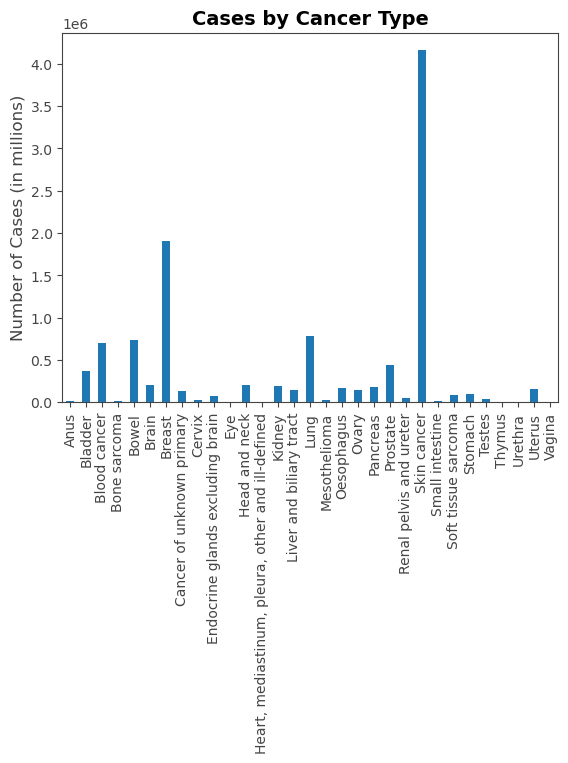

In [70]:
cases.plot(kind="bar")
plt.title("Cases by Cancer Type")
plt.ylabel("Number of Cases (in millions)")
plt.xlabel("") 
plt.show()

## Trend in Total Cancer Cases (2013–2022)

Total cancer cases by year:


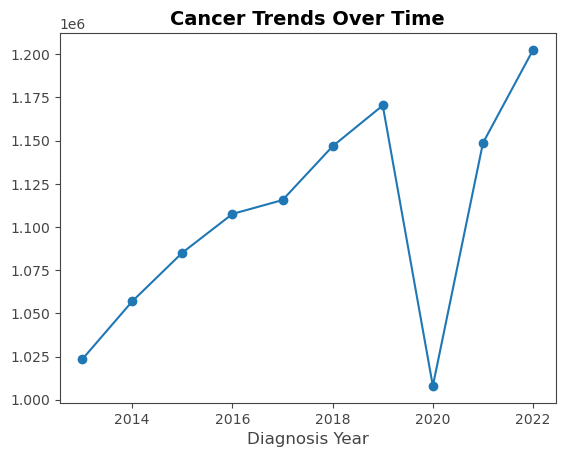

In [71]:
cases_by_year().plot(kind="line", marker="o", title="Cancer Trends Over Time")
plt.xlabel("Diagnosis Year") 
plt.show()

## Total Cancer Cases by Gender

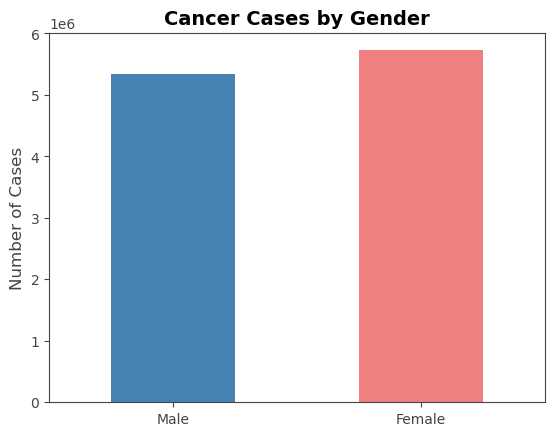

In [72]:
gender_cases = cases_by_gender()

gender_cases = gender_cases[gender_cases["Gender"] != "Persons"]

gender_cases.plot(kind='bar', x="Gender", y="Cases", color=['steelblue', 'lightcoral'], legend=False)
plt.title("Cancer Cases by Gender")
plt.xlabel("")
plt.xticks(rotation=360)
plt.ylabel("Number of Cases")
plt.show()

## Cancer Cases by IMD Quintile (2013–2022)

In [73]:
cases_by_imd()

Cancer cases by IMD quintile


,imd_quintile,Persons_count
0,1 - most deprived,1471380
1,2,1677054
2,3,1994106
3,4,2180049
4,5 - least deprived,2311220


Cancer cases by IMD quintile


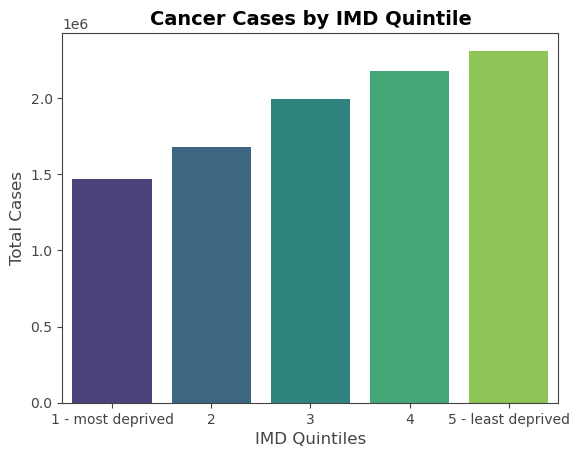

In [74]:
imd_cases = cases_by_imd()
sns.barplot(x='imd_quintile', y='Persons_count', data=imd_cases, hue='imd_quintile', palette="viridis", legend=False)
plt.title("Cancer Cases by IMD Quintile")
plt.xlabel("IMD Quintiles")
plt.ylabel("Total Cases")
plt.show()

## Cancer Incidence Rates by IMD Quintile (per 100k population)

In [75]:
imd_rate = df_pivot_rate.groupby('imd_quintile')['rate'].mean().reset_index()
print(imd_rate)

         imd_quintile       rate
0   1 - most deprived  14.100152
1                   2  13.919924
2                   3  14.238333
3                   4  14.595455
4  5 - least deprived  14.961439


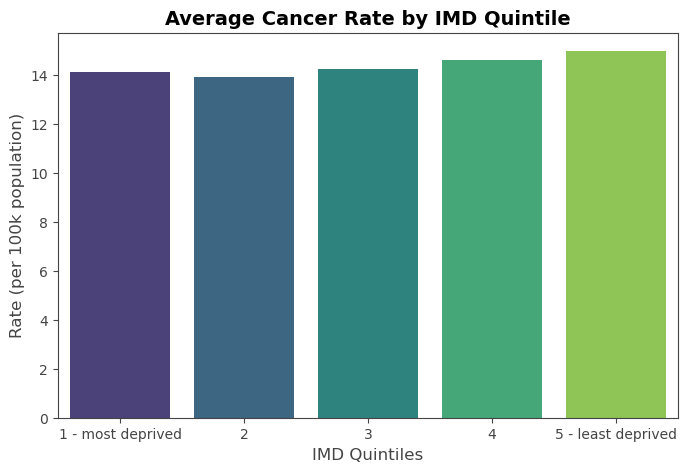

In [76]:
imd_rate = df_pivot_rate.groupby('imd_quintile')['rate'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='imd_quintile', y='rate', data=imd_rate, hue = 'imd_quintile', palette="viridis")
plt.title("Average Cancer Rate by IMD Quintile")
plt.xlabel("IMD Quintiles")
plt.ylabel("Rate (per 100k population)")
plt.show()

## Bivariate Analysis

## Breast Cancer Cases: Short-Term Trend (2018–2022)

In [91]:
total = year_and_cancer(range(2018, 2022), "Breast",return_sum = True)

Total Breast cases in [2018, 2019, 2020, 2021]: 757529


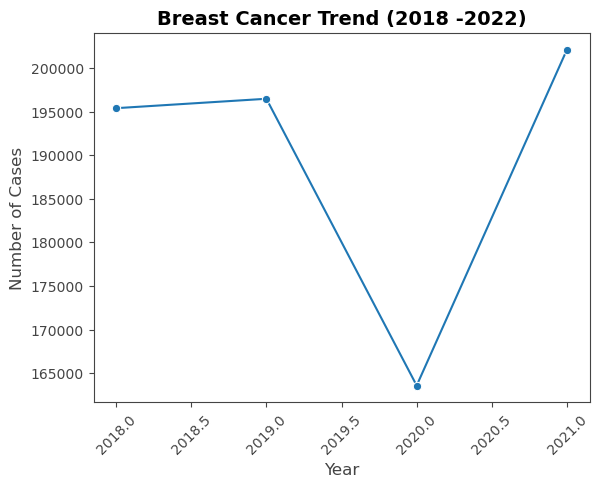

In [94]:
filtered_df = year_and_cancer(range(2018,2022), "Breast")
yearly_cases = filtered_df.groupby('diagnosisyear')['Persons_count'].sum().reset_index()
sns.lineplot(x='diagnosisyear', y='Persons_count', data=yearly_cases, marker="o")
plt.title("Breast Cancer Trend (2018 -2022)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Number of Cases")
plt.show()

## Cancer Cases by Gender (2018)

In [96]:
 yearlycases_by_gender(2018)

Total cases by gender in 2018:


,Gender,Cases
0,Male_count,557538
1,Female_count,589211
2,Persons_count,1146749


Total cases by gender in 2018:


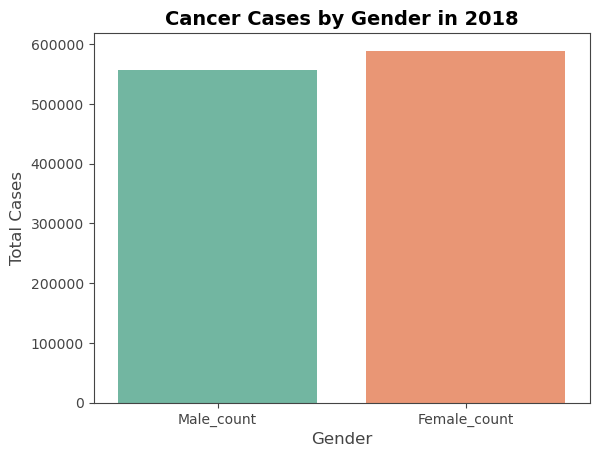

In [86]:
gender_cases = yearlycases_by_gender(2018)
gender_cases = gender_cases[gender_cases['Gender'] != "Persons_count"]
sns.barplot(x='Gender', y='Cases', data=gender_cases, hue='Gender', palette="Set2", legend=False)
plt.title("Cancer Cases by Gender in 2018")
plt.ylabel("Total Cases")
plt.xlabel("Gender")
plt.show()

## Distribution of Cancer Cases by Type and Socioeconomic Deprivation (IMD Quintiles)

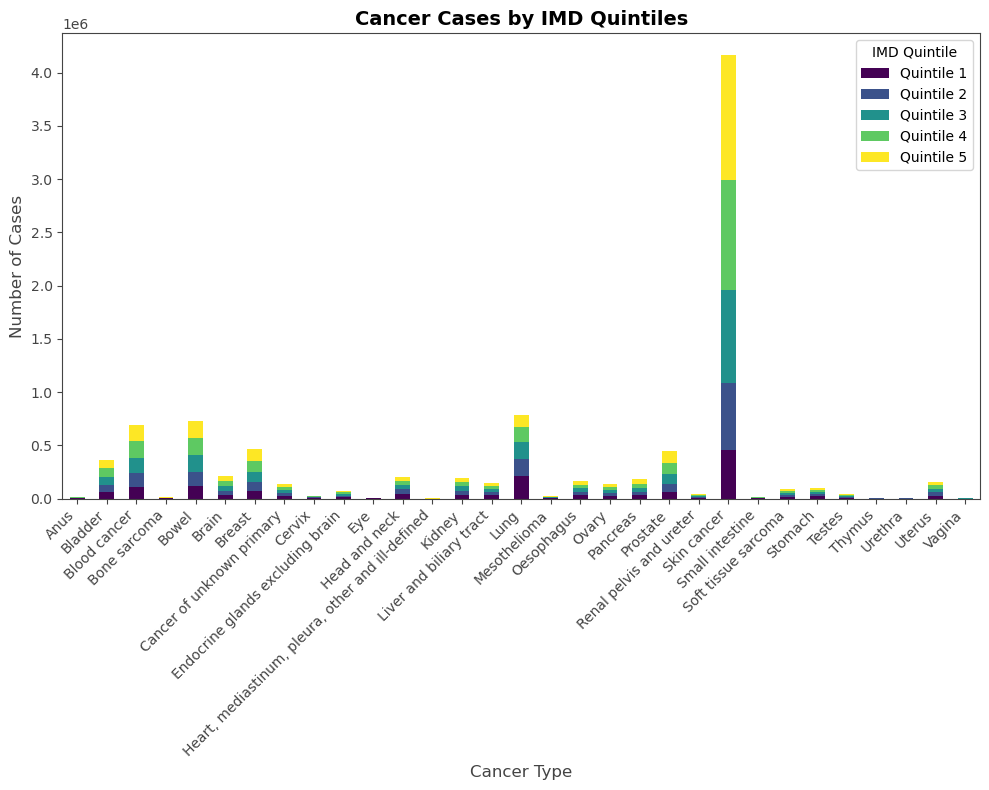

In [103]:
imd_cases = compare_quintiles()
imd_cases = imd_cases.set_index('Cancer Type')
imd_cases.plot(kind='bar', stacked=True, figsize=(10, 8),  colormap="viridis")
plt.title("Cancer Cases by IMD Quintiles")
plt.ylabel("Number of Cases")
plt.xlabel("Cancer Type")
plt.xticks(rotation=45, ha="right")
plt.legend(title="IMD Quintile")
plt.tight_layout()
plt.show()

## Breast Cancer Cases by Stage at Diagnosis (2018)

In [107]:
cases_by_cancer_stage(2018, "Breast", gender="Persons_count")


Persons_count cases for Breast in 2018 by stage:


,stage_at_diagnosis,Persons_count
0,Missing,5128
1,Stage 1 & 2,36699
2,Stage 3 & 4,6280
3,Unstageable,91



Persons_count cases for Breast in 2018 by stage:


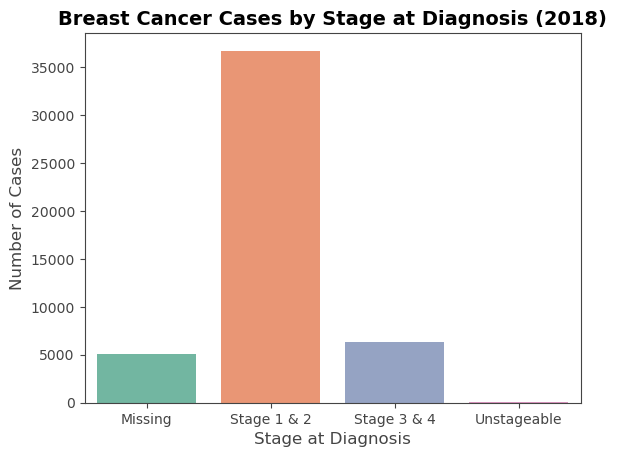

In [108]:
stage_cases = cases_by_cancer_stage(2018, "Breast", gender="Persons_count")

sns.barplot(x="stage_at_diagnosis", y="Persons_count", hue = 'stage_at_diagnosis', data=stage_cases, palette="Set2")
plt.title("Breast Cancer Cases by Stage at Diagnosis (2018)")
plt.xlabel("Stage at Diagnosis")
plt.ylabel("Number of Cases")
plt.show()

## Multivariate Analysis

## Skin Cancer Trend by Gender (2013–2022)

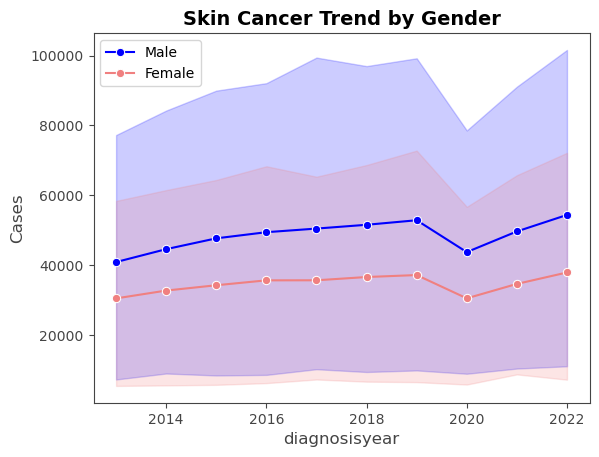

In [113]:
skin_cancer = df_pivot_overall[df_pivot_overall['ndrs_main_group'] == "Skin cancer"]

sns.lineplot(x='diagnosisyear', y='Male_count', data=skin_cancer, marker="o", label="Male", color ='blue')
sns.lineplot(x='diagnosisyear', y='Female_count', data=skin_cancer, marker="o", label="Female", color = 'lightcoral')

plt.title("Skin Cancer Trend by Gender")
plt.ylabel("Cases")
plt.show() 

✅ This chart shows the trend of skin cancer cases for males and females over time. Both genders follow a similar upward trajectory, though case numbers are consistently higher in males. 

## Gender-wise Distribution of Cancer Cases (2018)

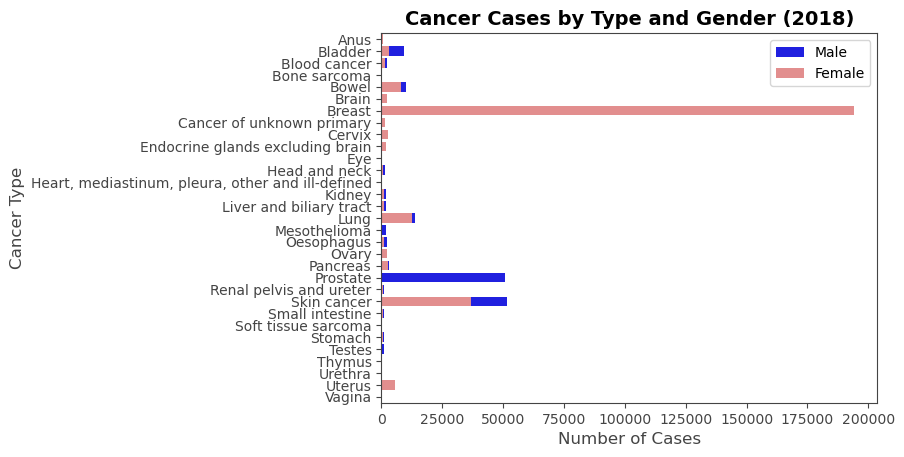

In [120]:
year = df_pivot_overall[df_pivot_overall['diagnosisyear'] == 2018].copy()
sns.barplot(y='ndrs_main_group', x='Male_count', data=year, color="blue", label="Male", errorbar=None)
sns.barplot(y='ndrs_main_group', x='Female_count', data=year, color="lightcoral", label="Female", errorbar=None)
plt.xlabel("Number of Cases")
plt.ylabel("Cancer Type")
plt.legend()
plt.title("Cancer Cases by Type and Gender (2018)")
plt.show() 

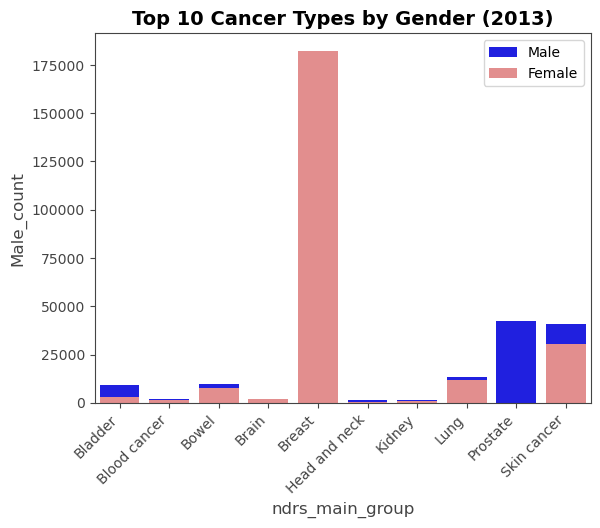

In [136]:

year = df_pivot_overall[df_pivot_overall['diagnosisyear'] == 2013].copy()


year['Total_cases'] = year['Male_count'] + year['Female_count']
top10 = year.groupby('ndrs_main_group')['Total_cases'].sum().nlargest(10).index

subset = year[year['ndrs_main_group'].isin(top10)]

sns.barplot(x='ndrs_main_group', y='Male_count', data=subset, color="blue", label="Male",errorbar=None)
sns.barplot(x='ndrs_main_group', y='Female_count', data=subset, color="lightcoral", label="Female",errorbar=None)

plt.xticks(rotation=45, ha="right")
plt.legend()
plt.title("Top 10 Cancer Types by Gender (2013)")
plt.show()

In [137]:
def top_cancers_by_gender(year, n=10):
    year_df = df_pivot_overall[df_pivot_overall['diagnosisyear'] == year].copy()
    year_df['Total_cases'] = year_df['Male_count'] + year_df['Female_count']
    
    top_cancers = year_df.groupby('ndrs_main_group')['Total_cases'].sum().nlargest(n).index
    subset = year_df[year_df['ndrs_main_group'].isin(top_cancers)]
    
    
    #plt.figure(figsize=(10,6))
    sns.barplot(x='ndrs_main_group', y='Male_count', data=subset, color="blue", label="Male")
    sns.barplot(x='ndrs_main_group', y='Female_count', data=subset, color="lightcoral", label="Female")
    
    plt.xticks(rotation=45, ha="right")
    plt.legend()
    plt.title(f"Top {n} Cancer Types by Gender ({year})")
    plt.ylabel("Number of Cases")
    plt.xlabel("Cancer Type")
    plt.tight_layout()
    plt.show()

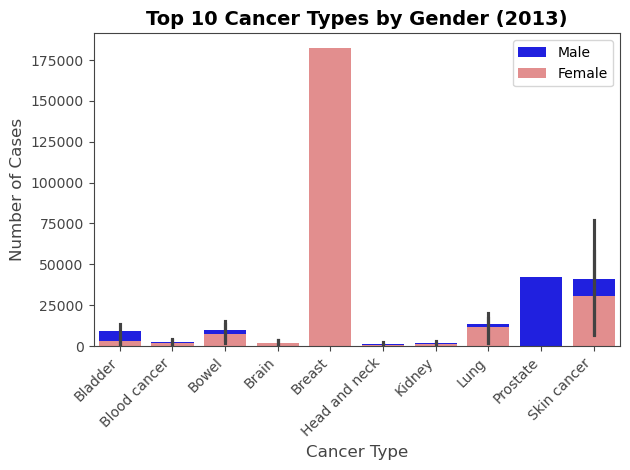

In [138]:
top_cancers_by_gender(2013, n=10)

In [ ]:
yearly_cases_all = cases_by_year('Breast')
yearly_cases_all_df = yearly_cases_all.reset_index()

sns.lineplot(
    x='diagnosisyear',
    y='Persons_count',
    data=yearly_cases_all_df,
    marker="o"
)
plt.title("Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.show()
